# Histogram for the time of posting twitter -- John(Litao) Zhou

This is the test notebook used the twitter date that is selected to  analysize the data of **one day** for a better understanding of data science

In [2]:
#import the required libriary used for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json as js
import ast
import re
from datetime import datetime

In [3]:
#open file and handle the issue of single quotes
with open(r"corona_tweets_01_data.txt", encoding="utf8") as corona_file:
    tw=[]
    line= corona_file.readlines()
    for row in range(len(line)):
        temp = ast.literal_eval(line[row])
        tw.append(temp)

    tws_df=pd.DataFrame(tw)
    print(tws_df.head())

            author_id lang                                     public_metrics  \
0  879993257031196674   en  {'retweet_count': 11963, 'reply_count': 0, 'li...   
1           226061099   en  {'retweet_count': 48775, 'reply_count': 0, 'li...   
2           473948808   en  {'retweet_count': 104, 'reply_count': 0, 'like...   
3          4652626034   en  {'retweet_count': 85671, 'reply_count': 0, 'li...   
4           350979334   en  {'retweet_count': 30587, 'reply_count': 0, 'li...   

                                            entities  \
0  {'urls': [{'start': 77, 'end': 100, 'url': 'ht...   
1  {'mentions': [{'start': 3, 'end': 14, 'usernam...   
2  {'annotations': [{'start': 38, 'end': 42, 'pro...   
3  {'mentions': [{'start': 3, 'end': 14, 'usernam...   
4  {'mentions': [{'start': 3, 'end': 17, 'usernam...   

                                 attachments  \
0  {'media_keys': ['7_1240691535768780800']}   
1                                        NaN   
2                               

In [7]:
#define the helper function to do the function
def process_time(df):
    time_str = df['created_at'][11:19]
    time_whole = datetime.strptime(time_str, '%H:%M:%S')
    return datetime.strftime(time_whole, '%H')

In [8]:
#make an empty column
tws_df['time'] = np.NaN


# tws_df['time'] = tws_df.apply(lambda df: datetime.strptime(df['created_at'][11:19], '%H:%M:%S'), axis=1)
tws_df['time'] = tws_df.apply(process_time, axis=1)

print(tws_df)




                  author_id lang  \
0        879993257031196674   en   
1                 226061099   en   
2                 473948808   en   
3                4652626034   en   
4                 350979334   en   
...                     ...  ...   
503325  1046732981673504768   en   
503326            154739660   en   
503327            483671177   en   
503328             53231656   en   
503329   883099036865179648   en   

                                           public_metrics  \
0       {'retweet_count': 11963, 'reply_count': 0, 'li...   
1       {'retweet_count': 48775, 'reply_count': 0, 'li...   
2       {'retweet_count': 104, 'reply_count': 0, 'like...   
3       {'retweet_count': 85671, 'reply_count': 0, 'li...   
4       {'retweet_count': 30587, 'reply_count': 0, 'li...   
...                                                   ...   
503325  {'retweet_count': 237, 'reply_count': 0, 'like...   
503326  {'retweet_count': 2913, 'reply_count': 0, 'lik...   
503327  {'retweet_

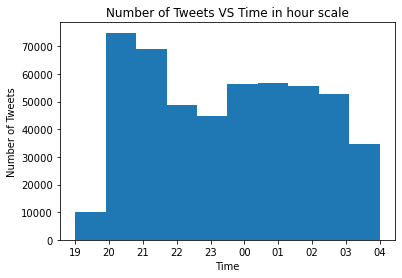

In [10]:

# tws_df_sp = tws_df.sample(frac=0.001)
plt.hist(tws_df['time'])
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets VS Time in hour scale')
plt.show()

